# Lab | Customer Analysis Round 4


In today's lesson we talked about continuous distributions (mainly normal distribution), linear regression and how multicollinearity can impact the model. In this lab, we will test your knowledge on those things using the marketing_customer_analysis.csv file. You have been using the same data in the previous labs (round 2 and 3). You can continue using the same jupyter file. The file can be found in the files_for_lab folder.

Get the data

Use the jupyter file from the last lab (Customer Analysis Round 3)

Complete the following task

1. Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)
2. Now we will try to check the normality of the numerical variables visually
- Use seaborn library to construct distribution plots for the numerical variables
- Use Matplotlib to construct histograms
- Do the distributions for different numerical variables look like a normal distribution
3. For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
4. Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/igorhufnagel/Desktop/Ironhack/LABS/Week 2/LAB_05/LAB_customer-analysis-round-3/lab-customer-analysis-round-3/files_for_lab/csv_files/CA_Round2_Dataframe.csv')

In [3]:
data.head()

,Unnamed: 0,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2
1,1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,1
2,2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,1


In [4]:
data.drop(['Unnamed: 0'], axis=1,inplace=True)

In [5]:
data.head()

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,1


In [6]:
# 1. Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical 
# columns in a dataframe called categoricals. (You can use np.number and np.object 
# to select the numerical data types and categorical data types respectively)

data.dtypes

unnamed: 0                         int64
customer                          object
state                             object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employmentstatus                  object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim          float64
months since policy inception      int64
number of open complaints        float64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
vehicle class                     object
vehicle size    

In [14]:
categoricals = data.select_dtypes('object')

In [15]:
numericals = data.select_dtypes(include=['float64', 'int64'])

In [16]:
numericals

,unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645,1
...,...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000,1
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929,1
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996,2
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849,2


In [17]:
categoricals

,customer,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,No,Basic,College,2011-02-18,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,2011-01-18,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2011-02-10,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,2011-01-11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,2011-01-17,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,2011-01-19,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,2011-01-06,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2011-02-06,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2011-02-13,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [ ]:
# 2. Now we will try to check the normality of the numerical variables visually

In [21]:
import warnings
warnings.filterwarnings('ignore')

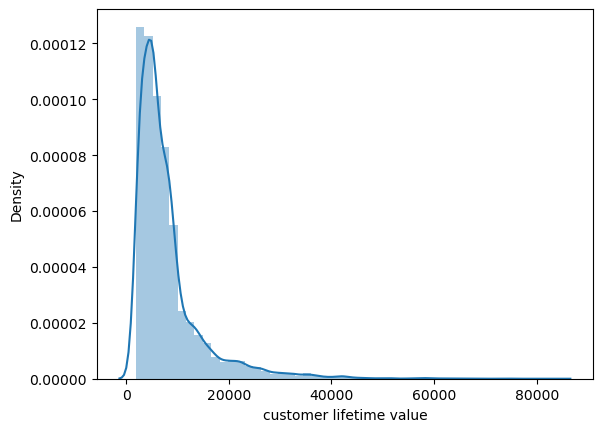

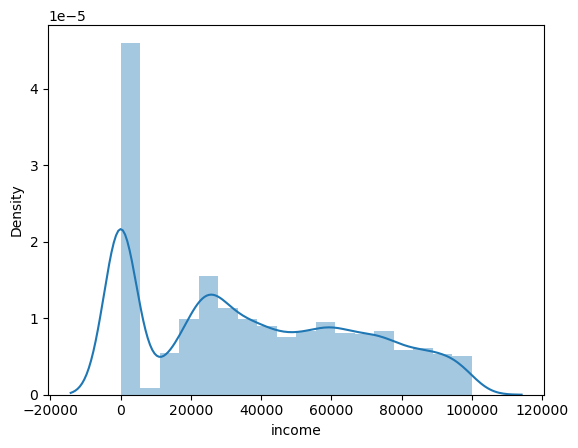

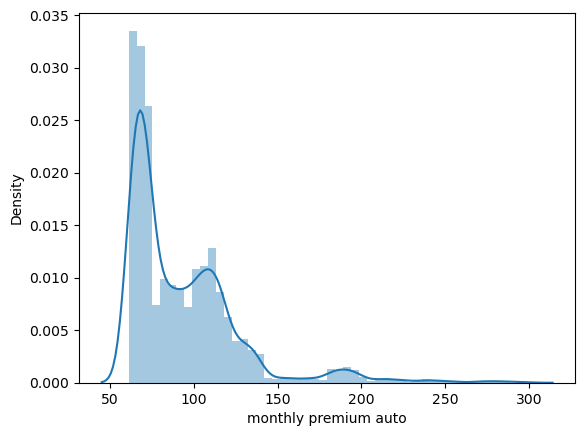

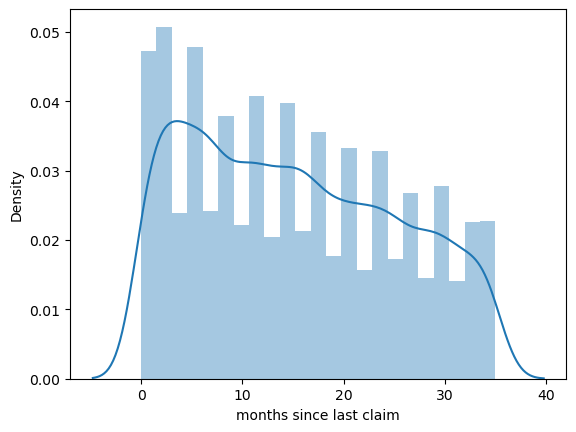

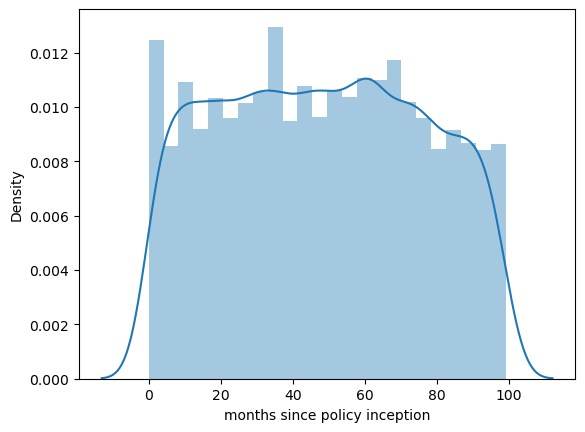

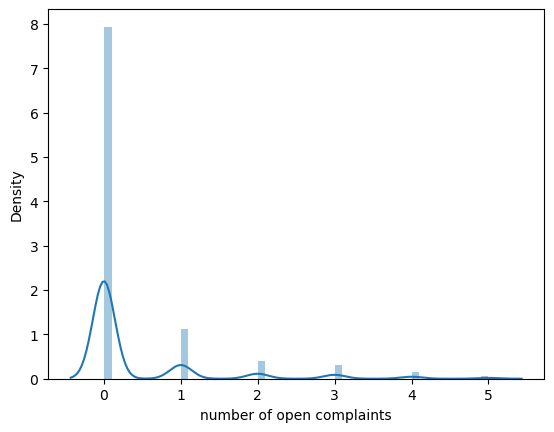

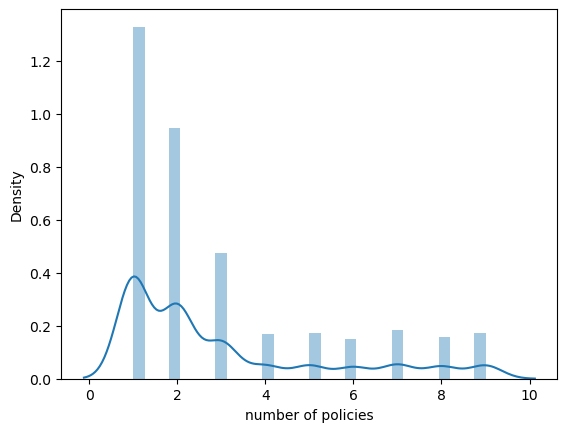

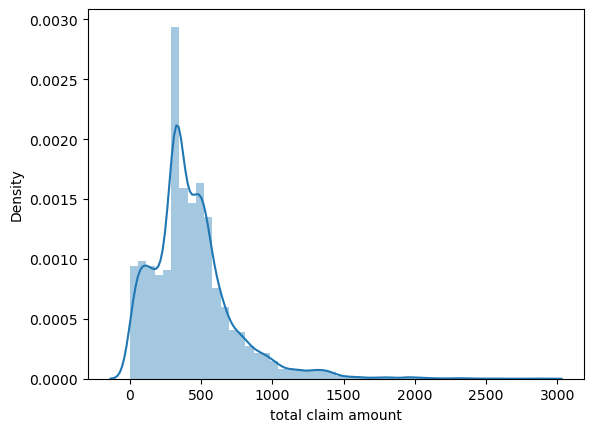

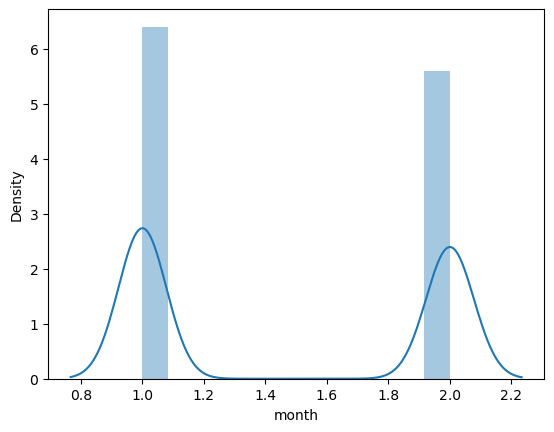

In [50]:
# - Use seaborn library to construct distribution plots for the numerical variables

for column in numericals.columns:
    sns.distplot(data[column])
    plt.show()

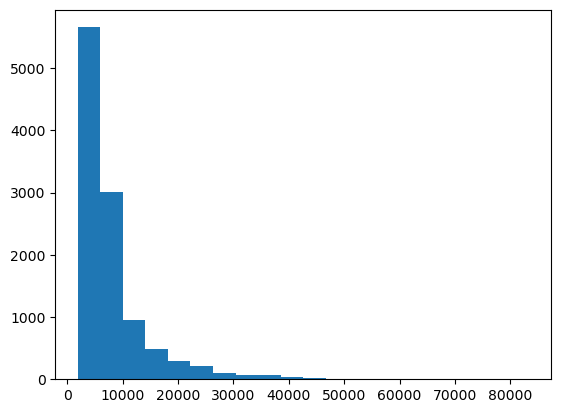

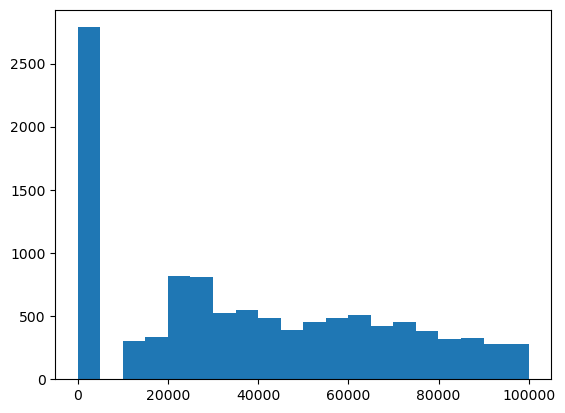

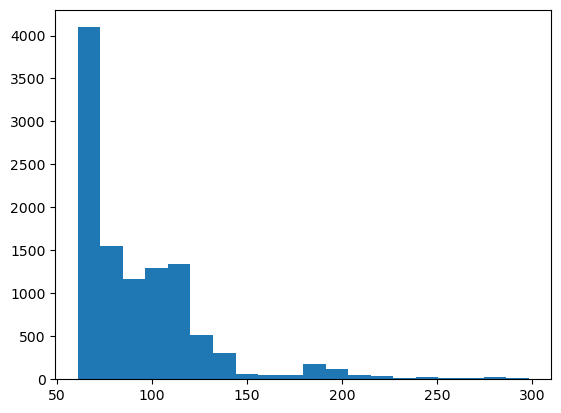

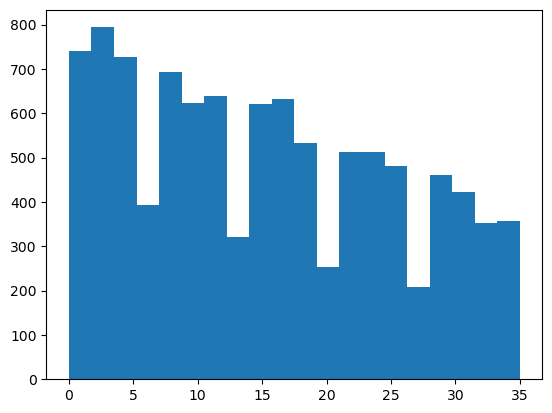

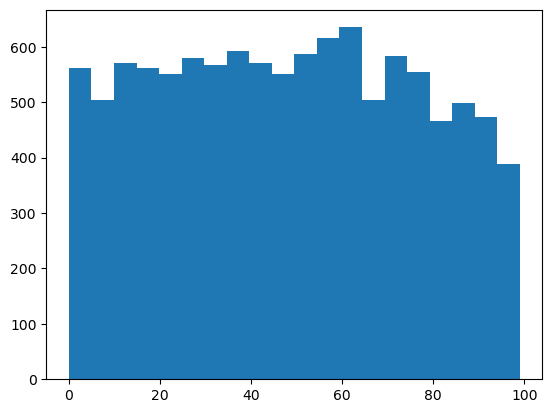

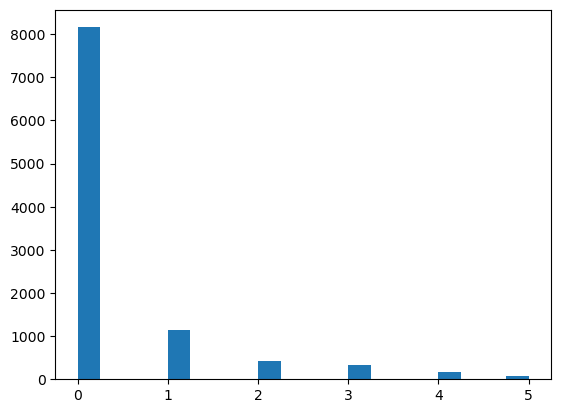

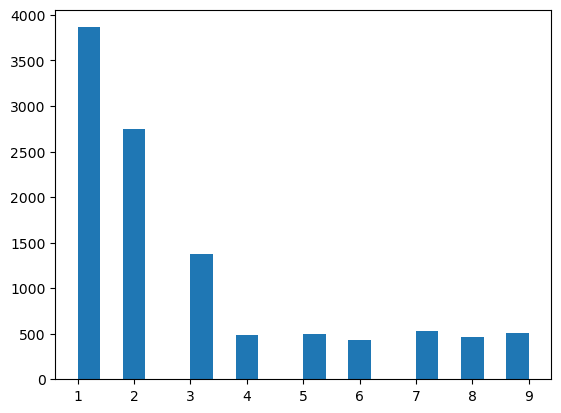

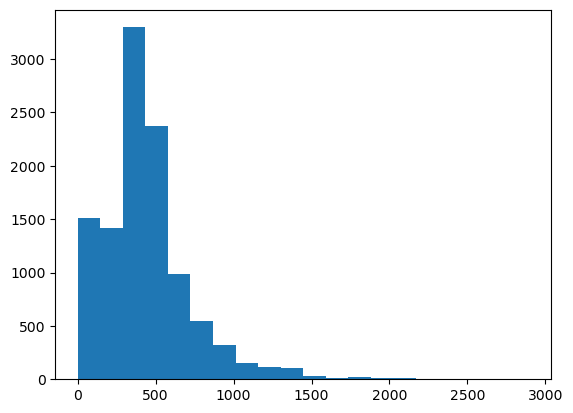

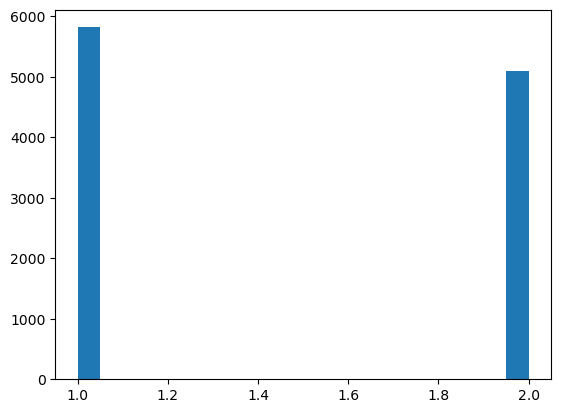

In [52]:
# - Use Matplotlib to construct histograms

for column in numericals.columns:
    plt.hist (numericals[column], bins = 20)
    plt.show()

In [53]:
# - Do the distributions for different numerical variables look like a normal distribution

import scipy.stats as stats

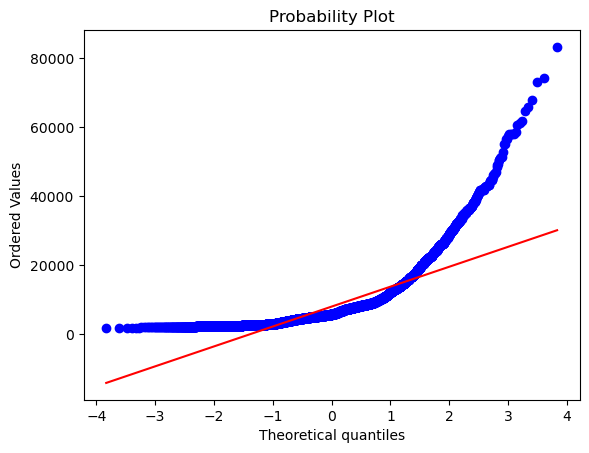

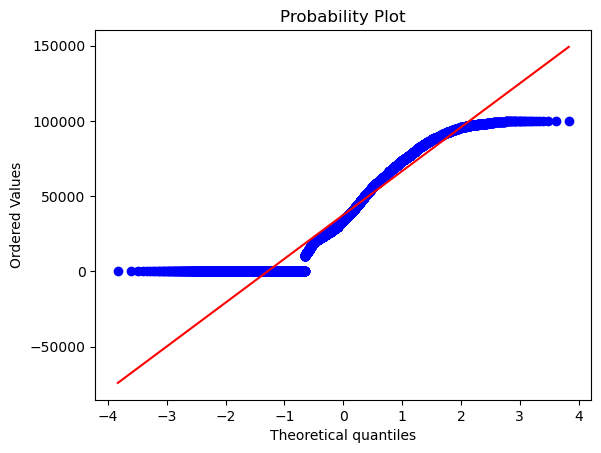

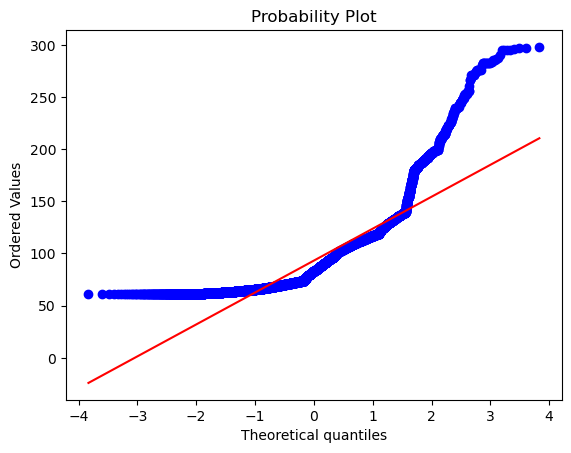

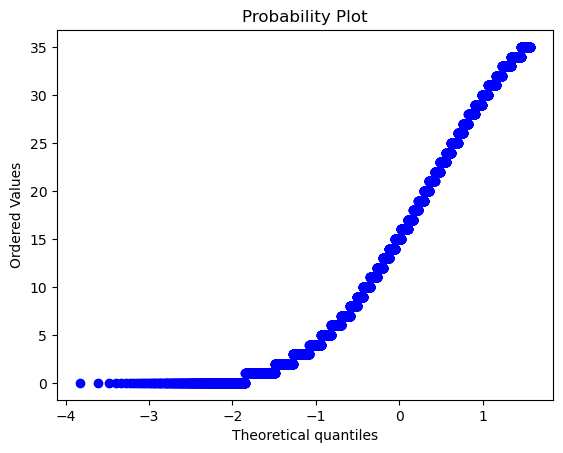

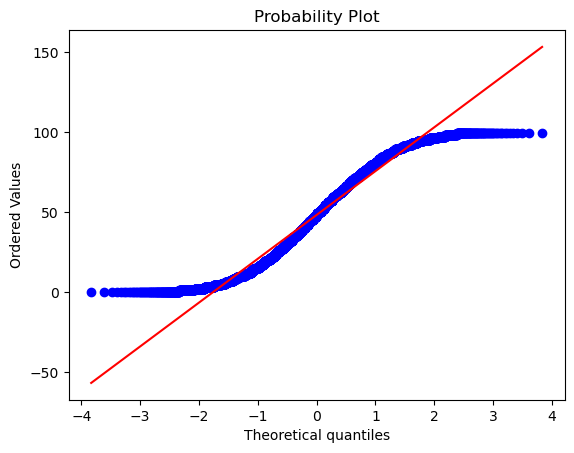

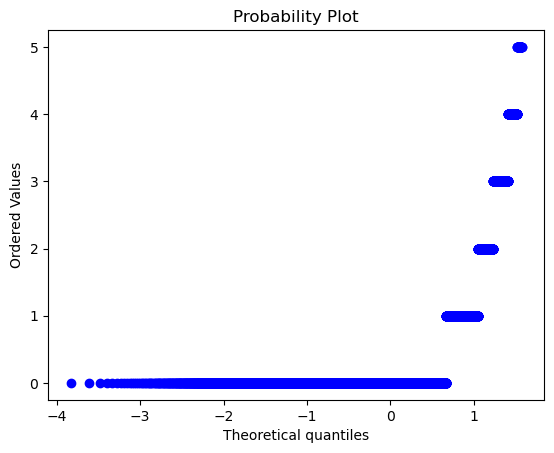

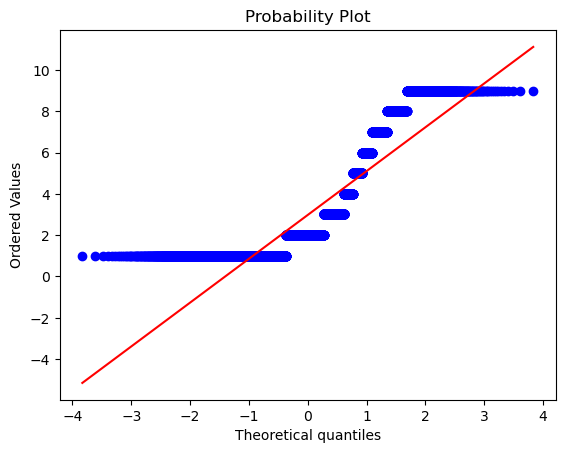

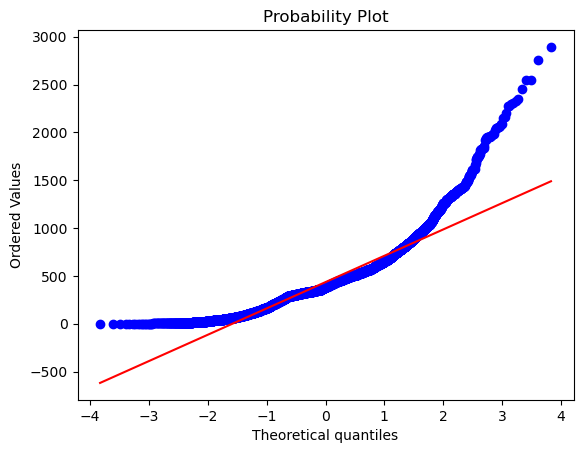

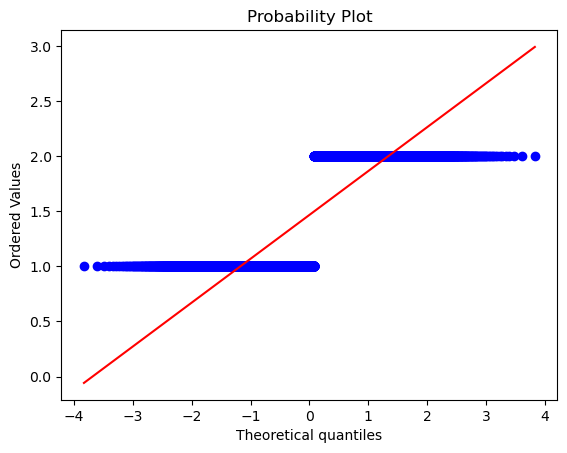

In [65]:
for columns in numericals.columns:
    stats.probplot(numericals[columns], dist='norm', plot=plt)
    plt.show()

In [ ]:
# from the graphs is possible to see that the variables are not normally distributed, because of 
# the dispersion of data around the central line.

In [ ]:
# 3. For the numerical variables, check the multicollinearity between the features. 
# Please note that we will use the column total_claim_amount later as the target variable.

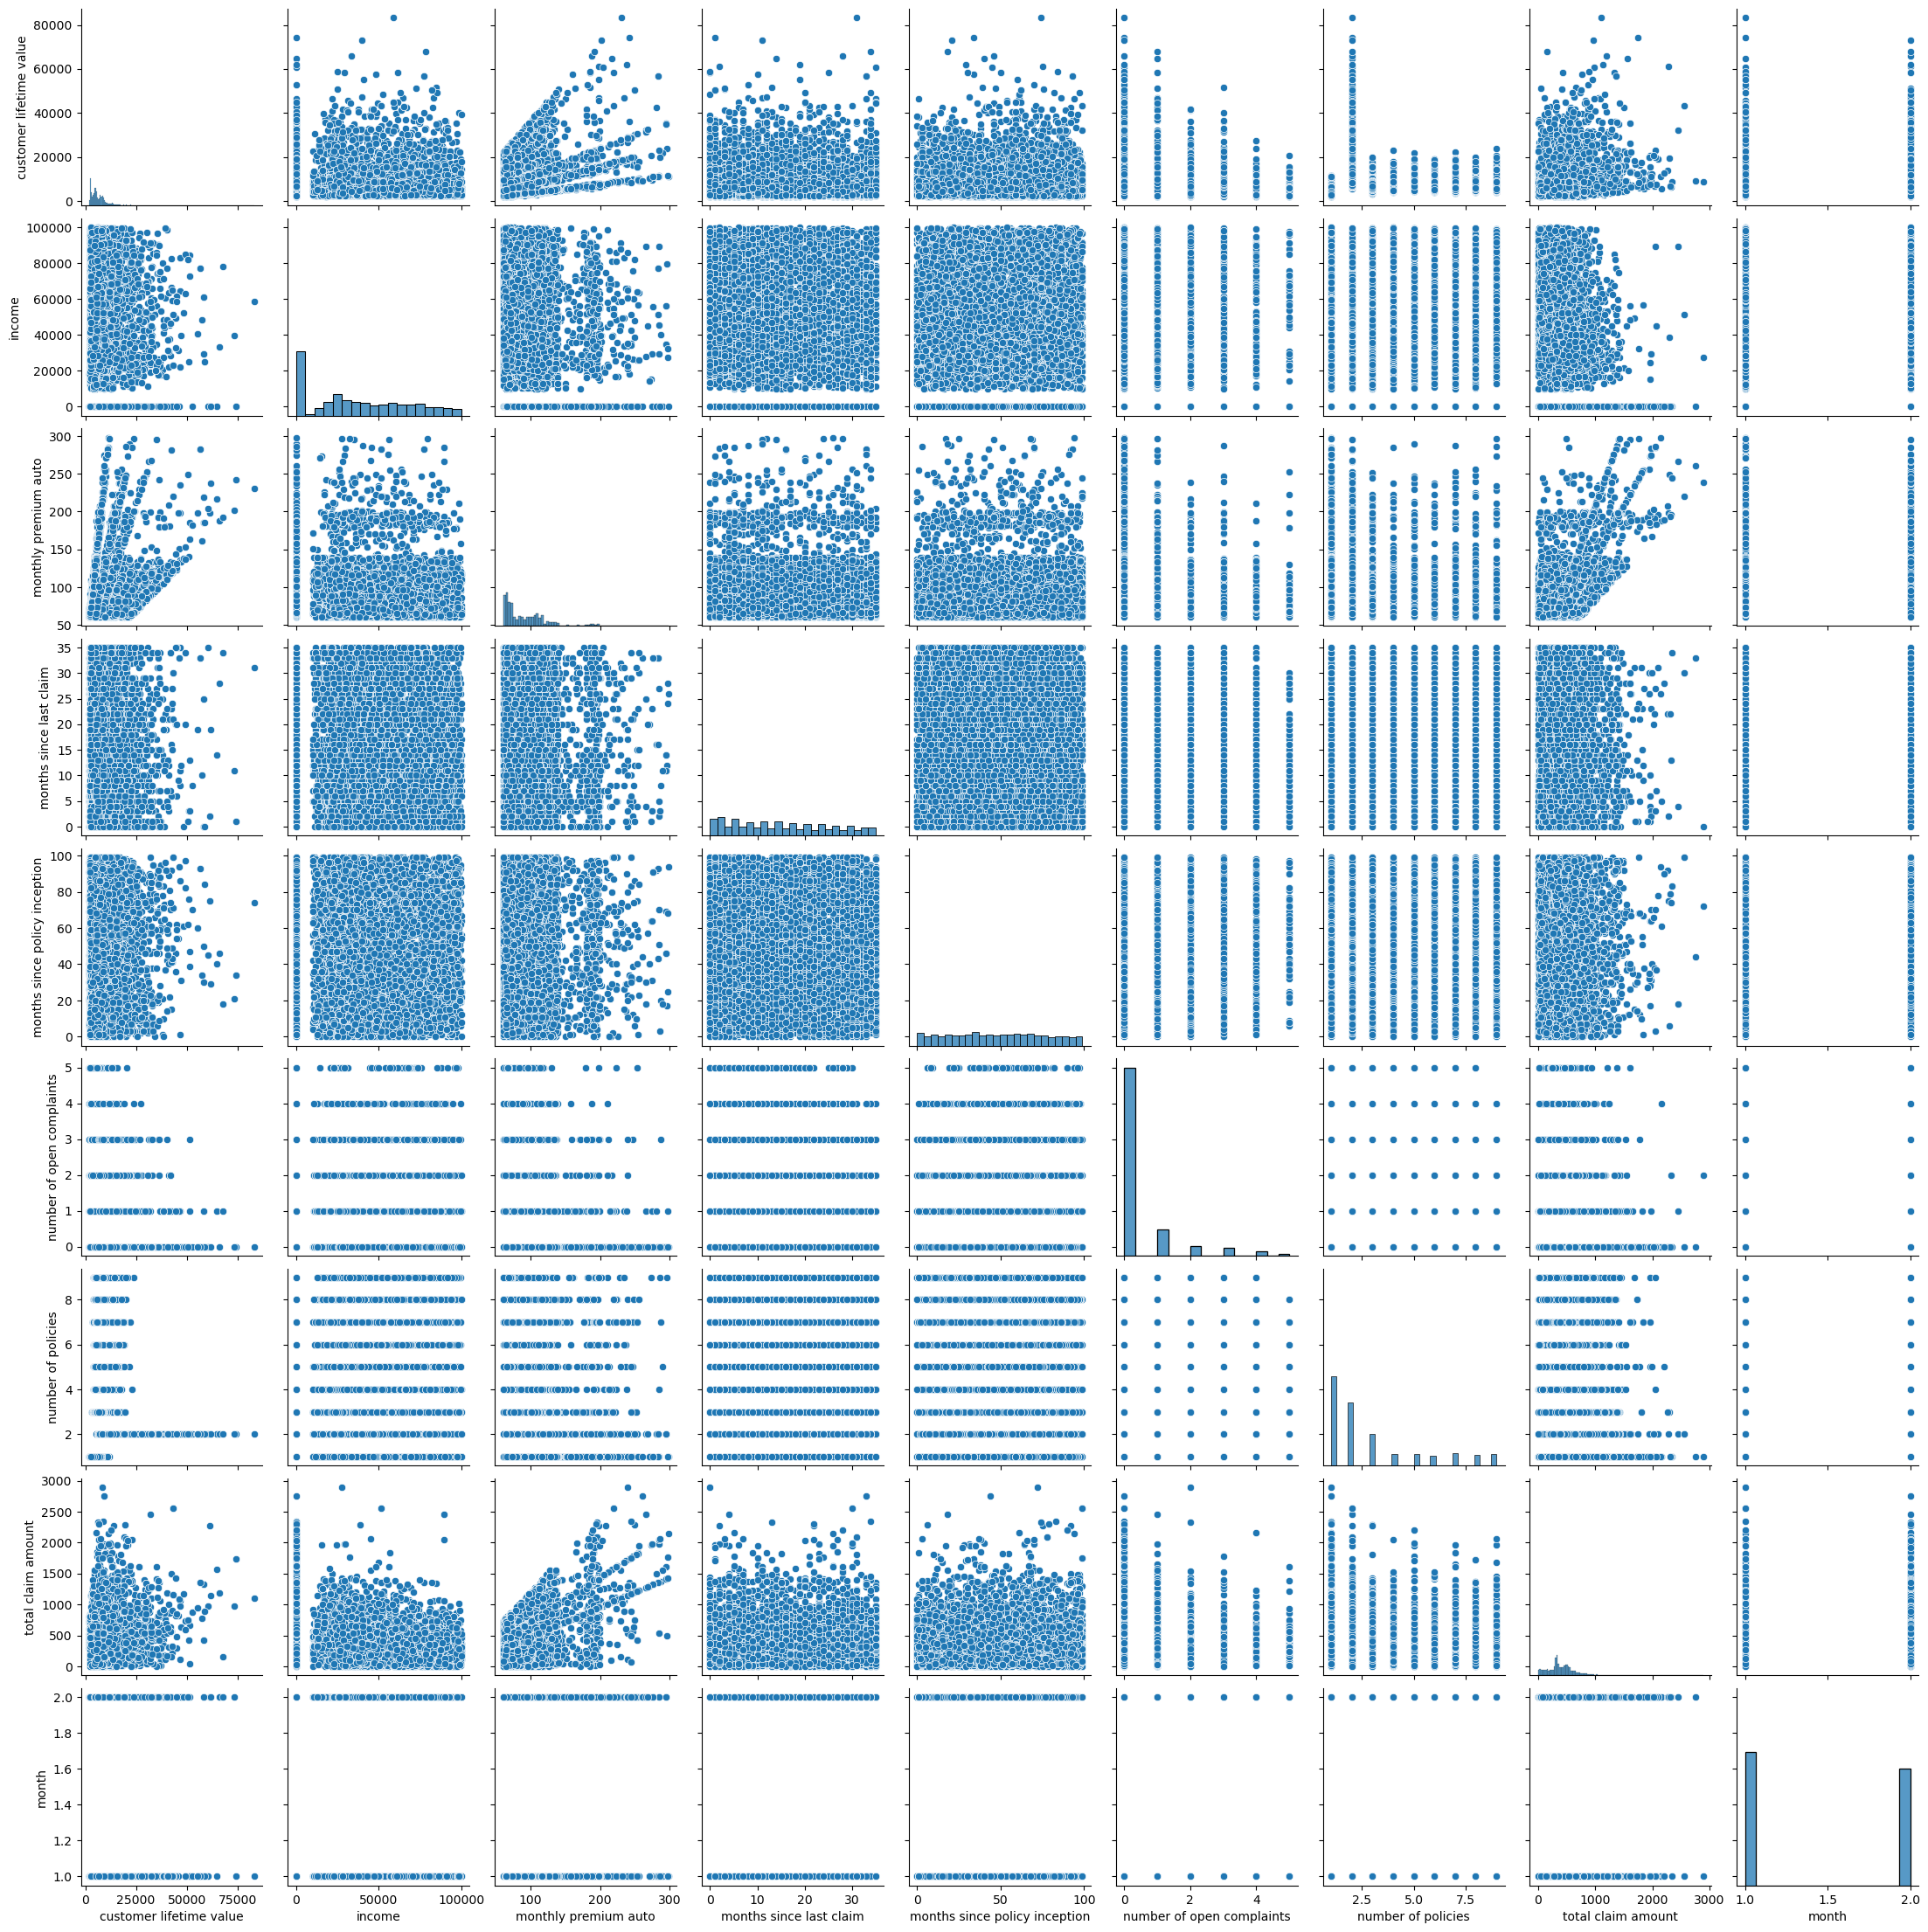

In [66]:
sns.pairplot(numericals)
plt.show()

In [67]:
data = numericals.corr()
data

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month
customer lifetime value,1.000000,0.028306,0.403069,0.016052,0.016960,-0.032243,0.016024,0.232626,-0.009234
income,0.028306,1.000000,-0.009788,-0.023814,-0.005903,0.007163,-0.009960,-0.354141,-0.000443
monthly premium auto,0.403069,-0.009788,1.000000,0.008744,0.018953,-0.010350,-0.020505,0.631799,0.007253
months since last claim,0.016052,-0.023814,0.008744,1.000000,-0.039318,0.002246,0.007678,0.013137,-0.019951
months since policy inception,0.016960,-0.005903,0.018953,-0.039318,1.000000,0.004376,-0.009123,0.003095,0.015163
number of open complaints,-0.032243,0.007163,-0.010350,0.002246,0.004376,1.000000,0.004098,-0.011379,-0.004813
number of policies,0.016024,-0.009960,-0.020505,0.007678,-0.009123,0.004098,1.000000,-0.008923,0.005127
total claim amount,0.232626,-0.354141,0.631799,0.013137,0.003095,-0.011379,-0.008923,1.000000,0.001425
month,-0.009234,-0.000443,0.007253,-0.019951,0.015163,-0.004813,0.005127,0.001425,1.000000


In [68]:
data_high = numerical.corr(method='pearson')[numerical.corr() > 0.5]
data_high

,unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month
unnamed: 0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer lifetime value,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monthly premium auto,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.631799,NaN
months since last claim,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
months since policy inception,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
number of open complaints,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
number of policies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
total claim amount,NaN,NaN,NaN,0.631799,NaN,NaN,NaN,NaN,1.000000,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


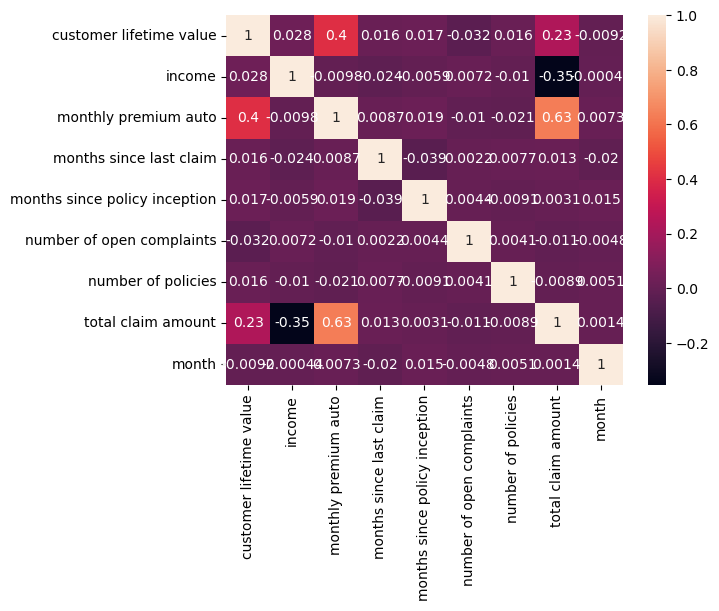

In [69]:
# 4. Drop one of the two features that show a high correlation between them (greater than 0.9). 
# Write code for both the correlation matrix and for seaborn heatmap. 
# If there is no pair of features that have a high correlation, then do not drop any features

sns.heatmap(numericals.corr(),annot=True)
plt.show()

In [ ]:
# None of the features have a correlation greater than 0.9 so none of them will be drop.